# Problem 1: Descriptive Statistics and Probability Theory: Real Data on CEO Compensation

First of all, as pre-requisite, importing useful libraries for data processing.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_notebook, show
from scipy import stats
import seaborn as sb
import sys

Next pre-requisite - loading data from ceo.xls file and display 5 first records.

In [3]:
ceo1999 = pd.read_excel('./Assignment_0/ceo.xls.')
ceo1999.head()

Now let's describe data to see some basic measurments.

In [66]:
ceo1999.describe()

,salary,totcomp,tenure,age,sales,profits,assets
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,2027.516779,8340.058166,7.834452,56.469799,11557.780984,700.460850,27054.290828
std,1722.566389,31571.803005,8.246721,6.806641,16168.368902,1542.538013,64659.043191
min,100.000000,100.000000,0.000000,34.000000,2896.400000,-2669.000000,717.800000
25%,1084.000000,1575.500000,2.000000,52.000000,4184.150000,108.450000,3856.950000
50%,1600.000000,2951.000000,5.000000,57.000000,6704.000000,333.100000,7810.800000
75%,2347.500000,6043.000000,10.000000,61.000000,12976.800000,738.000000,21105.550000
max,15250.000000,589101.000000,60.000000,84.000000,161315.000000,22071.000000,668641.000000


## 1.
## (a)

### Calculation:
Computing common location measures for variable totcomp:

In [67]:
mu= np.mean(ceo1999['totcomp'])
print ("Mean = %G" % mu)

trim_mu = stats.trim_mean(ceo1999['totcomp'], 0.05)
print("5-percent-trimmed mean = %G" % trim_mu)

med = np.median(ceo1999['totcomp'])
print("Median = %G" % med)

# Lower quartile (Q1) 
Q1 = np.percentile(ceo1999['totcomp'], 25, interpolation = 'midpoint') 
# Upper quartile (Q3) 
Q3 = np.percentile(ceo1999['totcomp'], 75, interpolation = 'midpoint') 
print("Lower quartile = %G, Upper Quartile = %G" % (Q1, Q3))

Q1_5 = np.quantile(ceo1999['totcomp'], 0.05, interpolation = 'midpoint')
Q3_5 = np.quantile(ceo1999['totcomp'], 0.95, interpolation = 'midpoint')
print("Lower 5 percent Quantile = %G, Upper 5 percent Quantile = %G" % (Q1_5, Q3_5))

Mean = 8340.06
5-percent-trimmed mean = 4637.68
Median = 2951
Lower quartile = 1575.5, Upper Quartile = 6043
Lower 5 percent Quantile = 787.5, Upper 5 percent Quantile = 24523.5


### Explanation:
Mean indicates that CEO in average recieve 8340 as total compensation.

5%-trimmed mean is a mean value which is calculated across given data set by cutting 5% of data from left and right sides of distribution (outliers are removed). Since 5%-trimmed mean equals to 4638 and almost 2 times less than usual mean. It means there are some CEO which has very high values of total compensation compare to vast majority of CEOs. 

Median just indicate which value from data set sits in the middle of distribution. Since median equal to 2951 it means that 50% of CEO has total compensation less than 2951 and other 50% of CEO has Total Compensation higheer than 2951.

Lower quartile indicates that middle value for lower 50% of distribution equal to 1575.5. So first 25% of CEOs has total compensation between 100(min value) and 1575.5. That second 25% of CEOs has total companation between 1575.5 and 2951.
Upper quartile indicates that middle value for uper 50% of distribution equal to 6043. So third 25% of CEO has total compensation between 2951 and 6043. While last 25% of CEOs has total compensation between 6043 and 589101(max value).

Lower 5% quantile indicates that value 787.5 is on the upper edge of first 5% of dataset. It means that 5% of CEOs has Total Compensation between 100(min value) and 787.5. As opposite other 95% of CEOs have Total Compensation between 787.5 and 589101(max value).
Upper 5% quantile shows that value 24523.5 is on the lower edge of last 5% of dataset. It means that 5% of CEOs have Total Compensation which is between 24523.5 and 589101(max value), while other 95% has Total Compensation between 100(min value)and 24523.5.

## (b)

### Calculation:
Computing necessary data and plot empirical cumulative distribution function (ECDF).

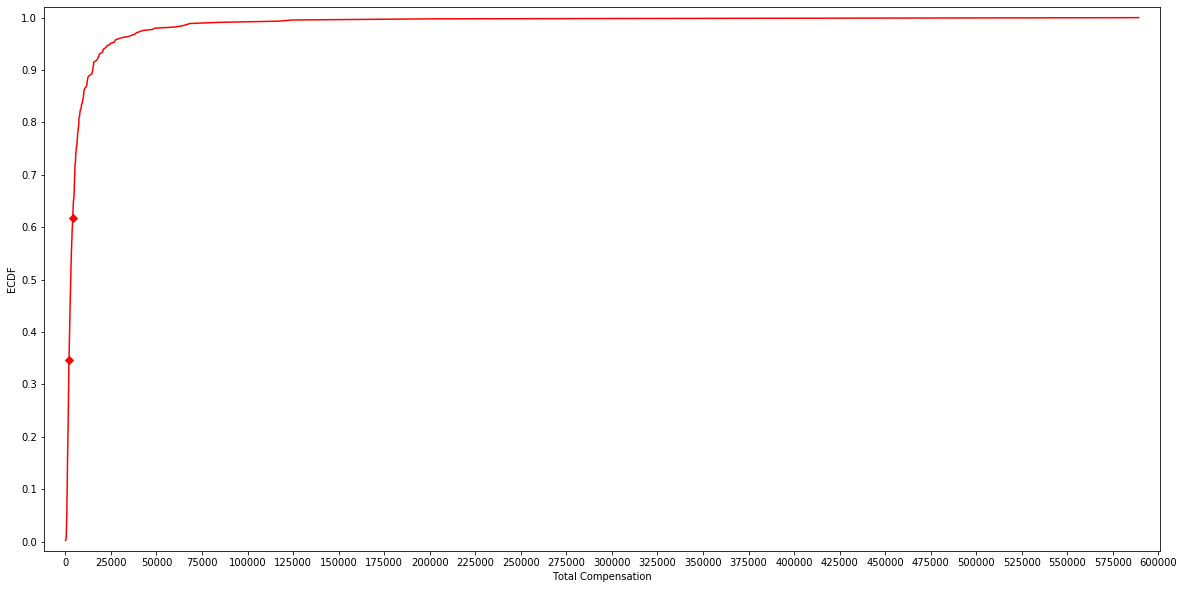

F^-1(0.1) =  1002.0
F^-1(0.9) =  15060.5


In [68]:
data = ceo1999['totcomp']
x = np.sort(data)
y = np.arange(1, len(x)+1)/len(x)

plt.figure(figsize=(20,10))
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.xticks(np.arange(0, 600001, step=25000))
markers_on = [154, 275]

plt.plot(x, y, '-rD', markevery=markers_on)
plt.xlabel('Total Compensation')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

Q_10 = np.quantile(ceo1999['totcomp'], 0.1, interpolation = 'midpoint')
Q_90 = np.quantile(ceo1999['totcomp'], 0.90, interpolation = 'midpoint')

print("F^-1(0.1) = ", Q_10)
print("F^-1(0.9) = ", Q_90)

### Explanation: 
#### (i) 

ECDF function with value 0.1 $F^{-1}(0.1)$ indicates maximum total Compensation for first 10% of CEOs aranged by Total Compensation amount. From this graphic it is clear that first 10% of CEOs have very little Total Compensation compare to values in the end of the curve. This function value will correspond to 10% quantile equal to 1002.

ECDF function with value 0.9 $F^{-1}(0.9)$ indicates maximum Total Compensaton for first 90% of CEOs aranged by Total Compensation amount. From this graphic it is clear that first 90% of CEOs have improve in Total Compensation compare to first 10% - $F^{-1}(0.1)$, but still far behind other 10% in the end of the line. Maximum Total Compensation for 90% is less than 25000 as per graphic. This function value will correspond to 90% quantile equal to 15060.5.

#### (ii)
ECDF function for value 2000 - $F(2000) - indicate hom many CEOs have Total Compensation less or equal to 2000. From this graphic we could conclude that around 34% of CEOs have Total Compensation less or equal to 2000 (lower marker on the graph).

ECDF function for value 4000 - $F(4000) - indicate hom many CEOs have Total Compensation less or equal to 4000. From this graphic we could conclude that around 62% of CEOs have Total Compensation less or equal to 4000 (upper marker on the graph).

## (c)

### Calculation:
Building histogram and Box plot for given CEO dataset.

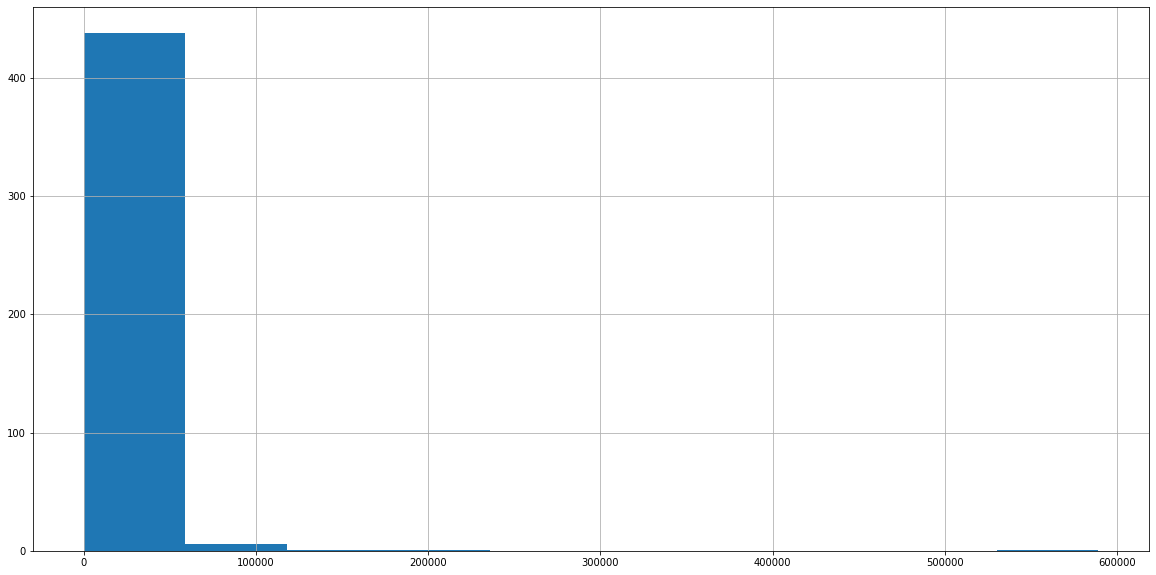

In [69]:
plt.figure(figsize=(20,10))
ceo1999['totcomp'].hist(density=False)
plt.show()

Examine histogram we could conclude that vast majority of data belongs to single bean. Distribution is highly asymetric. 400+ entries from total of 447 entries are in single bean, which confirms that there are outliers in data with relatively high Total Compensation. To visualize it's even better we could build Box plot.

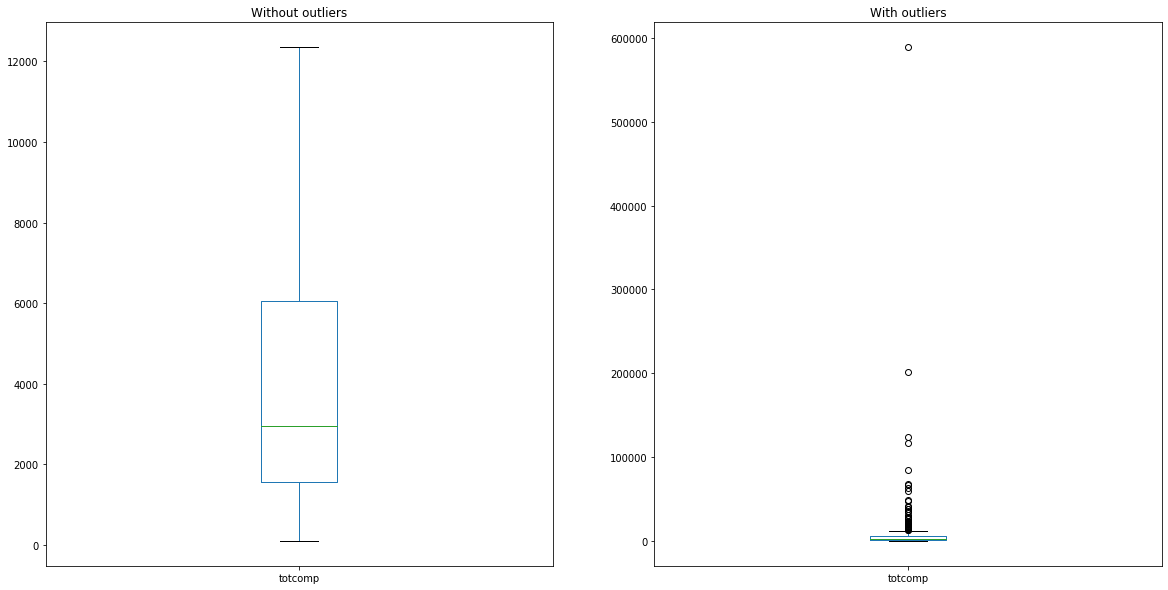

In [70]:
plt.figure(figsize=(20,10))

plt.subplot(121)
ceodf = ceo1999[['totcomp']]
ceodf.boxplot(grid=False, showfliers=False)
plt.title('Without outliers')

plt.subplot(122)
ceodf = ceo1999[['totcomp']]
ceodf.boxplot(grid=False, showfliers=True)
plt.title('With outliers')

plt.show()


### Explanation:
From Box plot with and without outliers it becomes clear that there are few outliers in right part of distribution. Biggest part of data lies in interval [0; 12500] whether outliers has values up to almost 600000. Considering this location measures computed above are not appropriate due to outliers with very high Total Compensation. 

To confirm this let's compute interquartile range (IQR) which is difference between upper and lower quartiles. Any value which is outside of threshold will be considered as outlier. For IQR lower threshold value is lower quatile - 1.5 times IQR. Respectively upper threshold is upper quartile + 1.5 times IQR.

Alternatively we could calculate Z-score to check how symetric our distribution is. Z-score algorithm uses Standard Deviation and Mean to identify outliers. Any value for which Z-score higher that abs(3) will be considered as outlier.

In [71]:
IQR = Q3 - Q1
data = ceo1999[['totcomp']]

z = np.abs(stats.zscore(data))

data_o_iqr = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Outliers identified by IQR algorithm - ', data_o_iqr.shape[0])
#print(data_o_iqr)

data_o_z = data[(z > 3).all(axis=1)]
print('Outliers identified by Z-Score algorithm - ', data_o_z.shape[0])
#print(data_o_z)

Outliers identified by IQR algorithm -  51
Outliers identified by Z-Score algorithm -  4


## (d)

### Explanation:
Matplotlib.Histogram, used above, has default number of bins equal to 10. Other methods which are used in software today to calculate number of bins could be divided into two categories:
- Normal Reference rules;
- Bayesin Models.

Normal Reference rules have Scott and Freedman & Diaconis methods. Both assume that data is close to normal distribution and try to minimize difference between histogram and underlying distribution of data. Such rules provide good trade-off between accurate representation of data and noise reduction. Also they are not computational expensive. Downside of this methods is an assumption about data being normally distributed, hence such methods are not optimal for complex distributions.

Bayesin Models uses fitness fucntion on data to compute optimal bin size. Knuth method uses fixed bin size, while Bayesian Blocks method choose bins with different size. Since both methods requires minimization of cost function on the actual data, they are much more computation expensive compare with Normal Reference rules.

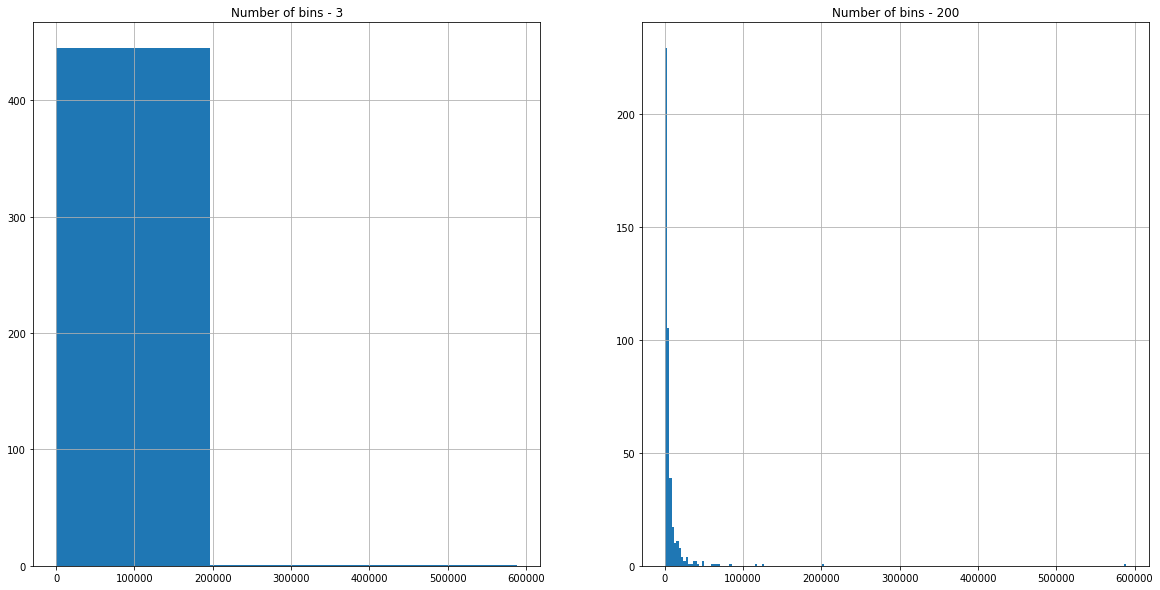

In [72]:
plt.figure(figsize=(20,10))

plt.subplot(121)
ceo1999['totcomp'].hist(bins=3)
plt.title('Number of bins - 3')

plt.subplot(122)
ceo1999['totcomp'].hist(bins=200)
plt.title('Number of bins - 200')

plt.show()

If we plot histograms with small amount of bins (the one on the left uses 3 bins only) than it is hard to make any sense out of it. Data is clubbed together in few columns.

On other hand, if we choose large number of bins (200 for right histogram above). Than we have more insights into data, however in such case there are number of empty beans with no data and majority of bins is useless.

In a nutshell, choosing right number of bins is important, otherwise useful insights could be missed. Usually optimal number of bins is found during multiple experiments, unless more sophisticated approach is used, as described above.

## (e)

### Calculation:
In order to normalize distribution let's apply natural logarithm function to Total Compensation. Once applied - we need to build histogram and Box plot again and calculate location measurments.

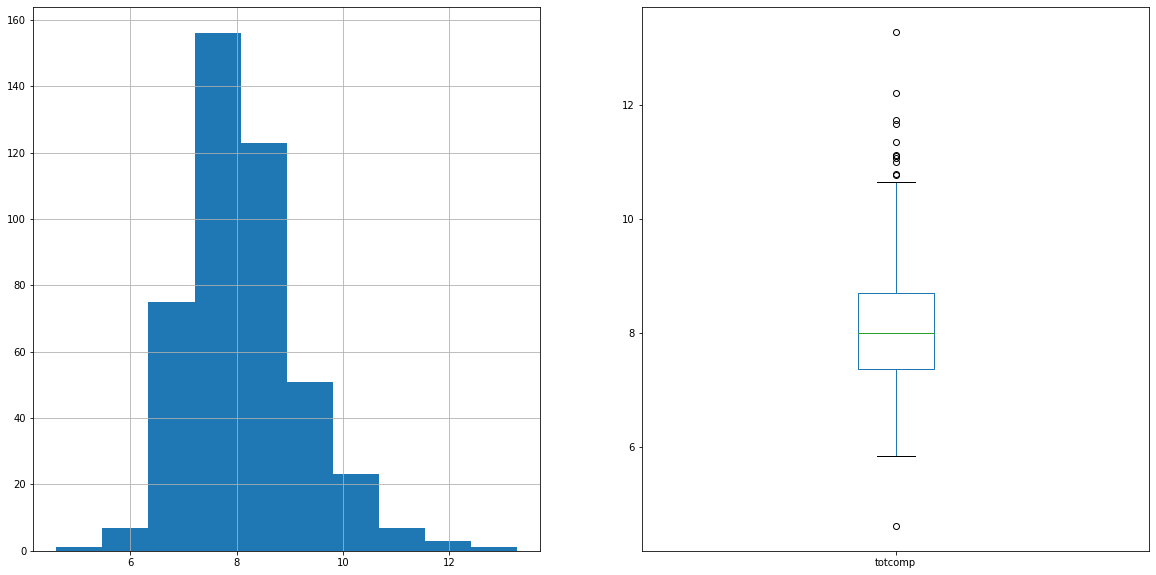

Original Mean = 8340.06
Mean after normalization = 8.13569
Original Median = 2951
Median after normalization = 7.9899


In [73]:
plt.figure(figsize=(20,10))

data_ln_hist = ceo1999['totcomp'].transform(np.log)
data_ln_bp = ceo1999[['totcomp']].transform(np.log)

plt.subplot(121)
data_ln_hist.hist()

plt.subplot(122)
data_ln_bp.boxplot(grid=False, showfliers=True)

plt.show()

mu= np.mean(ceo1999['totcomp'])
print ("Original Mean = %G" % mu)
mu_ln = np.mean(data_ln_hist)
print('Mean after normalization = %G' % mu_ln)


med = np.median(ceo1999['totcomp'])
print("Original Median = %G" % med)
med_ln = np.median(data_ln_hist)
print("Median after normalization = %G" % med_ln)

### Explanation:
After applying natural logarithm to Total Compensation data we could see that distribution became more normal like. From histogram perpspective (bin=10 by default) we could see that now highest bin is no more than 160 which is more than 2 time less compare to original histogram. From Box Plot we could notice that there are still outliers exist, but now they are no so distant as it was before.So in a nutshell, data is more equaly spread after normalization using natural logarithm. 

In addition, newly computed Mean and Median are very close to each other 8.13569 and 7.9899 respectively. Which also confirms that after natural logarithm application data distribution became more normal like distribution. Before difference between Mean and Median was very high - 8340.06 and 2951 respectively.  

From economics perspective we could conclude that Total Compensation of majority of CEOs from given dataset lies in the middle of the distribution with slight shift towards left edge. This means there are fewer CEOs (compare to the one in the middle of the distribution) whose Total Compensation either too small or too large. Also, we could conclude that number of CEOs who have high Total Compensation is bigger than number of CEOs with relatively small Total Compensation. We can make this conclusion by comparing left and right sides of the histogram (or upper and lower parts of Box Plot).

## 2.
## (a)

### Calculation:
Let's calculate Pearson correlation matrix in order to check if there any correlation between all variables in the dataset.

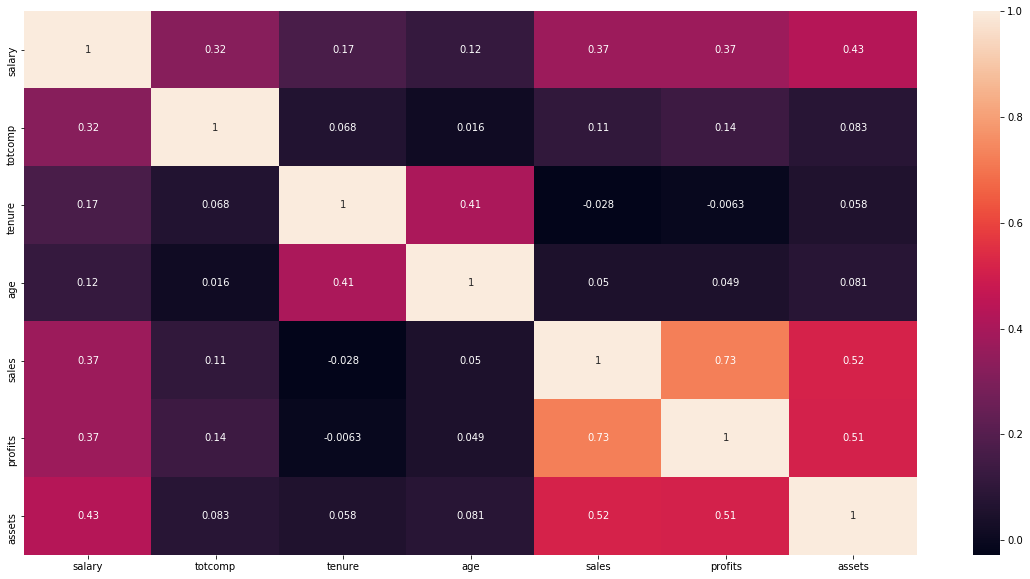

In [74]:
corr_matrix = ceo1999.corr(method="pearson")
plt.figure(figsize=(20,10))
sb.heatmap(corr_matrix, annot=True)
plt.show()

### Explanation:
From heatmap of Pearson correlation matrix we could notice that there are noticable (0.73) correlation between Sales and Profits variables. There are less noticable, but still significant correlations between Assets and Profits (0.51) or Assets and Sales(0.52). There are also less notable correlation (<0.5) between Age and Tenure, Assets and Salary, Profits and Salary, Sales and Salary.

In the end, Total Compensation variable we are looking into looks like have very weak correlations per Pearson method to all other variables. The most noticable correlation of Total Compensation is related to Salary variable, but it is still only 0.32, ,eans it is weak one.

## (b)

### Calculations:
To visualize observation from previous step let's buile scatter plots between Total Compensation and each other variable.

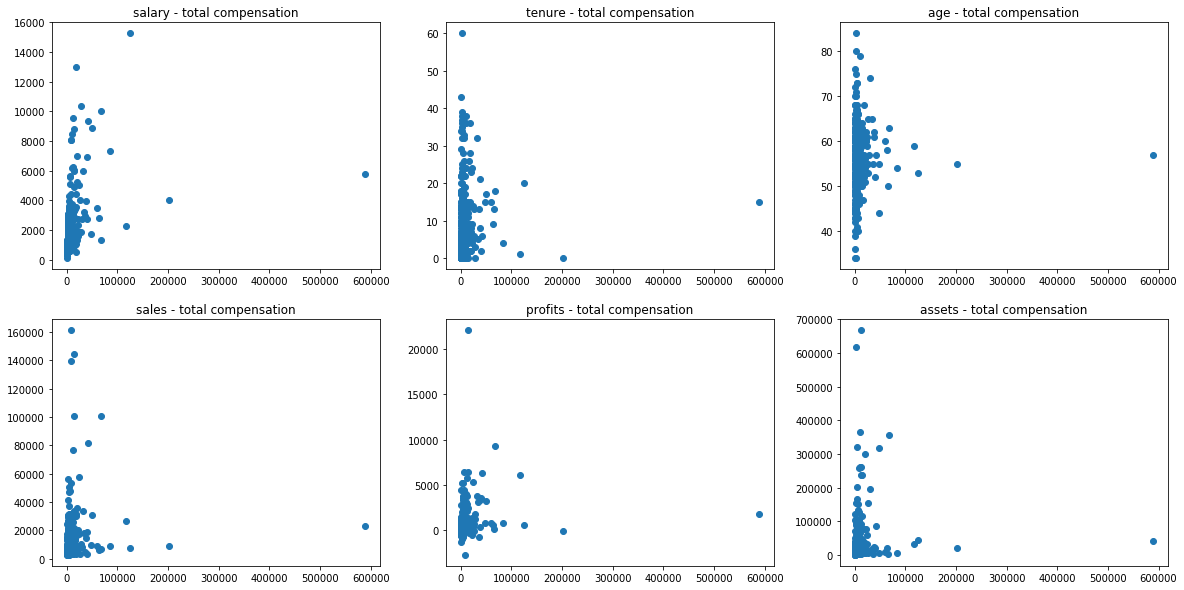

In [75]:
plt.figure(figsize=(20,10))

num=231

for col in ceo1999.columns:
    if (col != 'Unnamed: 7') & (col != 'totcomp'):
        plt.subplot(num)
        plt.title(col+' - total compensation')
        plt.scatter(x=ceo1999['totcomp'], y=ceo1999[col])
        num=num+1

plt.show()


### Explanation:
From those scatter plots we could conclude that Pearson linear correlation is not a good option here since data is not linearly distributed. Hence let's build heatmap for non-linear Spearman correlation.

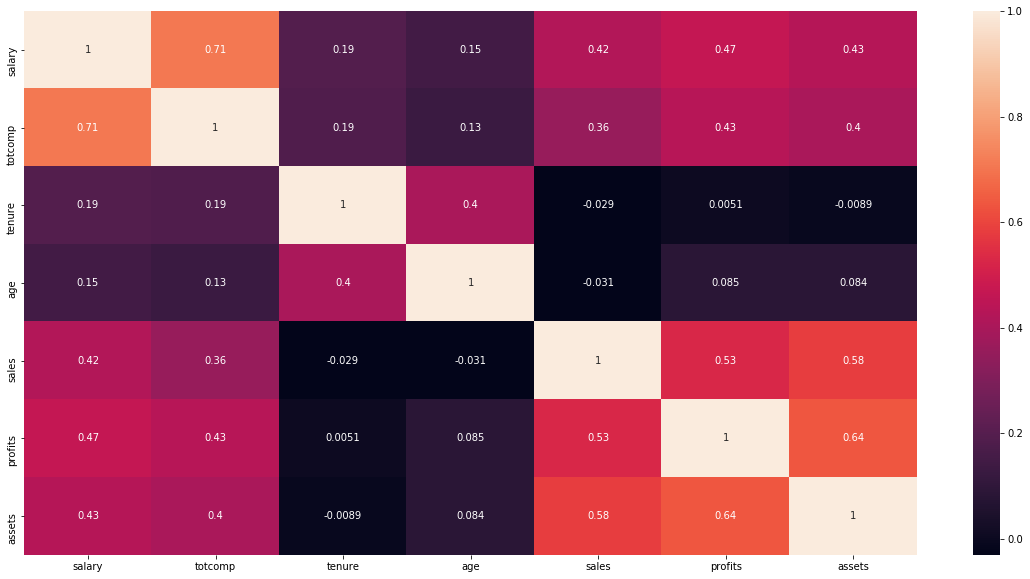

In [76]:
corr_matrix = ceo1999.corr(method="spearman")
plt.figure(figsize=(20,10))
sb.heatmap(corr_matrix, annot=True)
plt.show()

From Spearman's correlation heatmap we could see that there are notable non-linear correlations between Total Compensation and Salary, Total Compensation and Profit. There are less noticable correlations between Total Compensation and Assets, Total Compensation and Sales. All of those correlations was not visible in Pearson's heatmap, except Total Compensation and Salary, but it was much less noticable there.

As for other variables - Spearman's heatmap confirms what was in the Pearson's heatmap for Salary, Sales and Profits variables. Almost all correlation are stronger in Spearman's heatmap. The only correlation which goes down - Progit and Sales - it is the only linear correlation in this dataset. All other correlation are non-linear, rather than linear as per Spearman's heatmap.

Now let's find rank of observation totcomp=6000.

In [77]:
data = ceo1999['totcomp']
x = np.sort(data)
distance=sys.maxsize
rank=0

for idx, val in enumerate(x, start=1):
    dist_tmp=abs(6000-val)
    if dist_tmp < distance:
        distance = dist_tmp
        rank=idx
        
print('Rank of totcomp=6000 is ', rank)

Rank of totcomp=6000 is  335


It is equal to 335 which is position of element with Total Compensation which is closer to 6000.

## (c)
Now let's split dataset into two datasets: CEOs under 50 years old and CEOs above 50 years old. After split we will build histograms, ECDFs and calculate location metrics for both datasets.

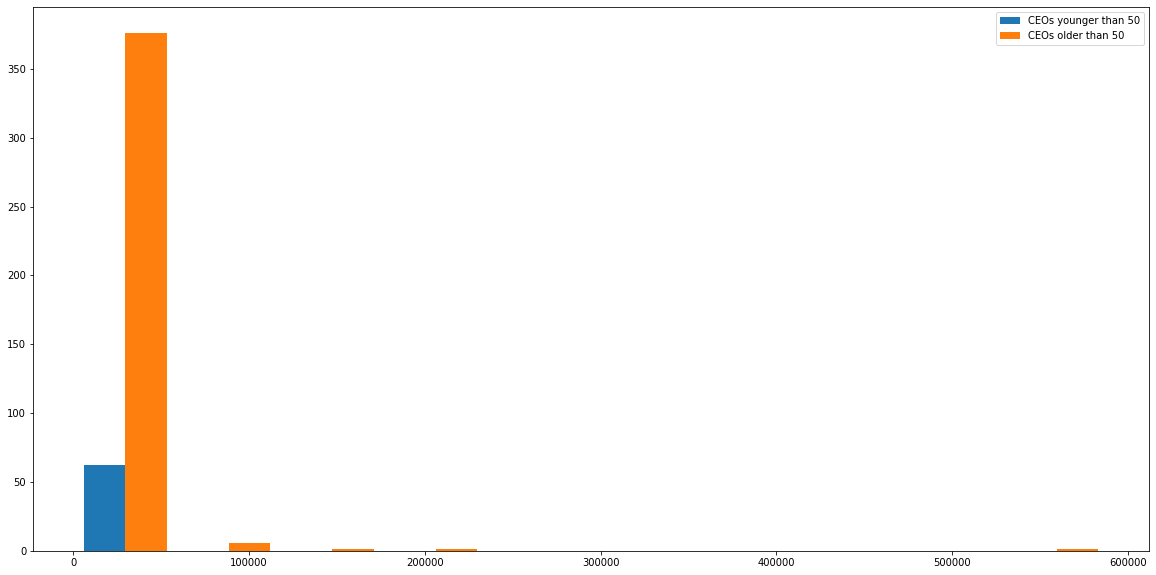

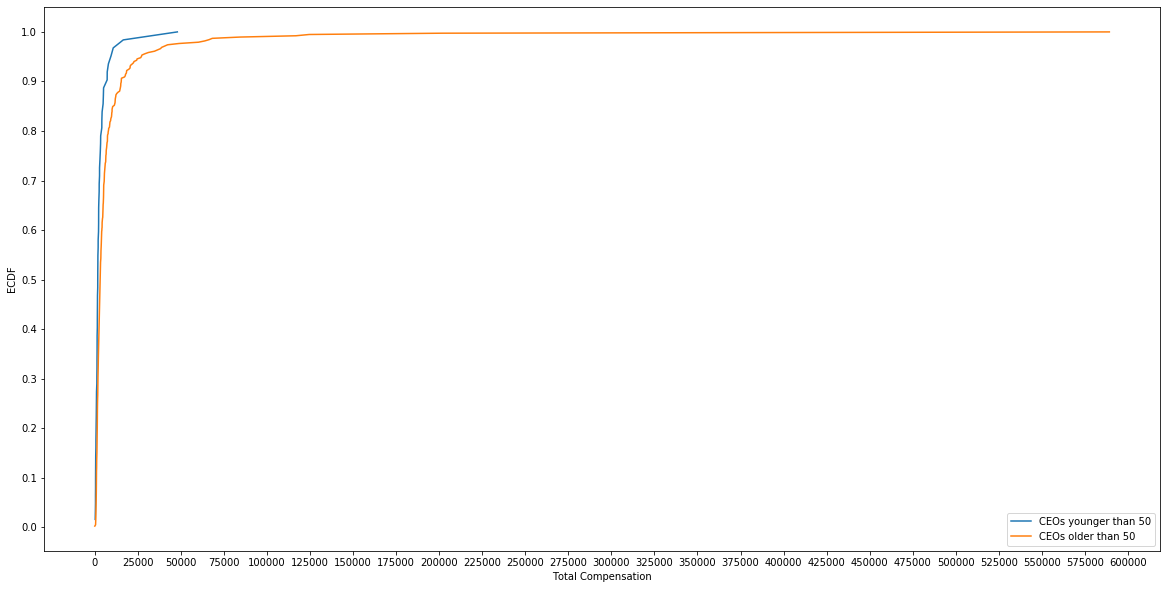

In [78]:
data = ceo1999
data_lt50 = data[data['age'] < 50]
data_ge50 = data[data['age'] >= 50]

plt.figure(figsize=(20,10))

plt.hist([data_lt50['totcomp'], data_ge50['totcomp']], label=['CEOs younger than 50', 'CEOs older than 50'])
plt.legend(loc='upper right')
plt.show()

x1 = np.sort(data_lt50['totcomp'])
y1 = np.arange(1, len(x1)+1)/len(x1)

x2 = np.sort(data_ge50['totcomp'])
y2 = np.arange(1, len(x2)+1)/len(x2)

plt.figure(figsize=(20,10))
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.xticks(np.arange(0, 600001, step=25000))

plt.plot(x1, y1, Label='CEOs younger than 50')
plt.plot(x2, y2, Label='CEOs older than 50')
plt.xlabel('Total Compensation')
plt.ylabel('ECDF')
plt.margins(0.05)
plt.legend(loc='lower right')
plt.show()

From Histogram plot we could notice that distribution for data under 50 years old is not spread so much as for CEOs data above 50 years old. Also there is much less CEOs with age under 50 years old compare to amount of CEOs above 50 years old.

ECDF plot indicates that CEOs under 50 years old have Total Compensation less that CEOs above 50 years old. On the plot ECDF for under 50 years goes on the left from ECDF for above 50 years old. Also we could conclude that around 90% of CEOs under 50 years old have not high and average total compensation which result in curve being almost vertical till $F^-1(0.9)$. The conclusion we could make for CEOs above 50 years old - around 50% of them have total compensation not high which results in ECDF curve close to vertical.

In [79]:
print('Descriptive statistic: CEOs younger than 50')
data_lt50.describe()

Descriptive statistic: CEOs younger than 50


,salary,totcomp,tenure,age,sales,profits,assets
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,1406.548387,3459.854839,4.225806,45.145161,8463.419355,345.038710,11844.753226
std,805.548173,6416.934986,4.883627,3.328204,5596.839960,753.445276,24837.030464
min,297.000000,341.000000,0.000000,34.000000,3011.900000,-962.000000,825.100000
25%,750.000000,1067.750000,1.000000,44.000000,4175.250000,35.050000,2978.850000
50%,1321.000000,1819.000000,2.000000,46.000000,6660.750000,162.850000,5251.250000
75%,1800.000000,3235.000000,5.000000,47.000000,11464.875000,459.350000,7879.750000
max,4280.000000,48018.000000,18.000000,49.000000,29398.000000,4490.000000,165493.300000


In [80]:
print('Descriptive statistic: CEOs older than 50')
data_ge50.describe()

Descriptive statistic: CEOs older than 50


,salary,totcomp,tenure,age,sales,profits,assets
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,2127.516883,9125.961039,8.415584,58.293506,12056.093766,757.697662,29503.618961
std,1808.577723,33863.124895,8.529896,5.292446,17229.422089,1627.802871,68661.902876
min,100.000000,100.000000,0.000000,50.000000,2896.400000,-2669.000000,717.800000
25%,1117.000000,1679.000000,3.000000,55.000000,4193.700000,127.500000,4049.800000
50%,1660.000000,3161.000000,6.000000,58.000000,6805.900000,363.000000,8791.000000
75%,2460.000000,6537.000000,11.000000,61.000000,13447.200000,793.400000,23638.000000
max,15250.000000,589101.000000,60.000000,84.000000,161315.000000,22071.000000,668641.000000


From location measurments we could conclude that dataset for CEOs under 50 years old has much less outliers since total compensation Mean and Median are much closer to each other compare with dataset for CEO above 50 years old. Standard deviation which characterize width of distribution much less for CEOs under 50 years old dataset, which also proove that there are less outliers and they Total COmpensation less significant in absolute value, that for dataset of CEOs above 50 years old.

## 3.
## (a)
Now we wil lsplit data into different groups based on Salary and Age variables. For Age we will use same groups as before - Age <50 and Age >=50. For Salary we will use three groups: Salary < 3000, Salary between 3000 and 5000, Salary above 5000. Let's build contigency table with absolute and relative frequencies.

In [81]:
data = ceo1999

pd.crosstab([data['age'] < 50, data['age'] >= 50], [data['salary'] < 3000, (data['salary'] >= 3000) & (data['salary']<5000), data['salary'] >= 5000], rownames=['Age < 50', 'Age > 50'], colnames=['Salary < 3000', '3000< Salary <5000', 'Salary > 5000'], margins=True, margins_name='Total')

Salary < 3000      False        True Total
3000< Salary <5000 False  True False      
Salary > 5000       True False False      
Age < 50 Age > 50                         
False    True         25    37   323   385
True     False         0     3    59    62
Total                 25    40   382   447

In [82]:
data = ceo1999
pd.crosstab([data['age'] < 50, data['age'] >= 50], [data['salary'] < 3000, (data['salary'] >= 3000) & (data['salary']<5000), data['salary'] >= 5000], rownames=['Age < 50', 'Age > 50'], colnames=['Salary < 3000', '3000< Salary <5000', 'Salary > 5000'], normalize=True)

Salary < 3000          False               True 
3000< Salary <5000     False     True      False
Salary > 5000          True      False     False
Age < 50 Age > 50                               
False    True       0.055928  0.082774  0.722595
True     False      0.000000  0.006711  0.131991

### (b)
### Explanation:
Value $n_{12}$ in above table means that there are 37 CEOs in total which has Age more that 50 years and Salary between 3000 and 5000.
Value $n_{1.}$ in above table means that there are in total 385 whose Age above 50 years old.
Value $h_{12}$ in above table shows that there are 8,27% of total number of CEOs which has Age more that 50 years and Salary between 3000 and 5000.
Value $h_{1.}$ in above table shows that there are 86.13% of total number of CEOs which has Age above 50 years old.

### (c)
Now we will calculate dependence measure between groups of CEOs divided by Age and Salary.

In [83]:
data = ceo1999
         
n = data.shape[0]

crosstab = pd.crosstab([data['age'] < 50, data['age'] >= 50], [data['salary'] < 3000, (data['salary'] >= 3000) & (data['salary']<5000), data['salary'] >= 5000], rownames=['Age < 50', 'Age > 50'], colnames=['Salary < 3000', '3000< Salary <5000', 'Salary > 5000'], margins=True, margins_name='Total')

dep = 0
i=0
while i < crosstab.values.shape[0]-1:
    j=0
    while j < crosstab.values.shape[1]-1:
        dep+= ((crosstab.values[i][j] - (crosstab.values[i][crosstab.values.shape[1]-1] * crosstab.values[crosstab.values.shape[0]-1][j])/n)**2)/((crosstab.values[i][crosstab.values.shape[1]-1] * crosstab.values[crosstab.values.shape[0]-1][j])/n)
        j+=1
    i+=1
    
print('Measure of dependency (calculated manually) = %f' % dep)

f_obs = np.array([crosstab.iloc[0][0:3].values,
                  crosstab.iloc[1][0:3].values])
print('Measure of dependency (calculated via Scipy) = %f' % stats.chi2_contingency(f_obs)[0])

Measure of dependency (calculated manually) = 6.177696
Measure of dependency (calculated via Scipy) = 6.177696


I have done calculation both manually and uing Scipy. The results are same and equal to 6.177696 which means there isstrong dependency between Salary and Age variables.

# Problem 2: Descriptive Statistics and Probability Theory: Simulated Data

## (1)
### (a)
### Calculation:
Now building histogram and density function for N(10,3)

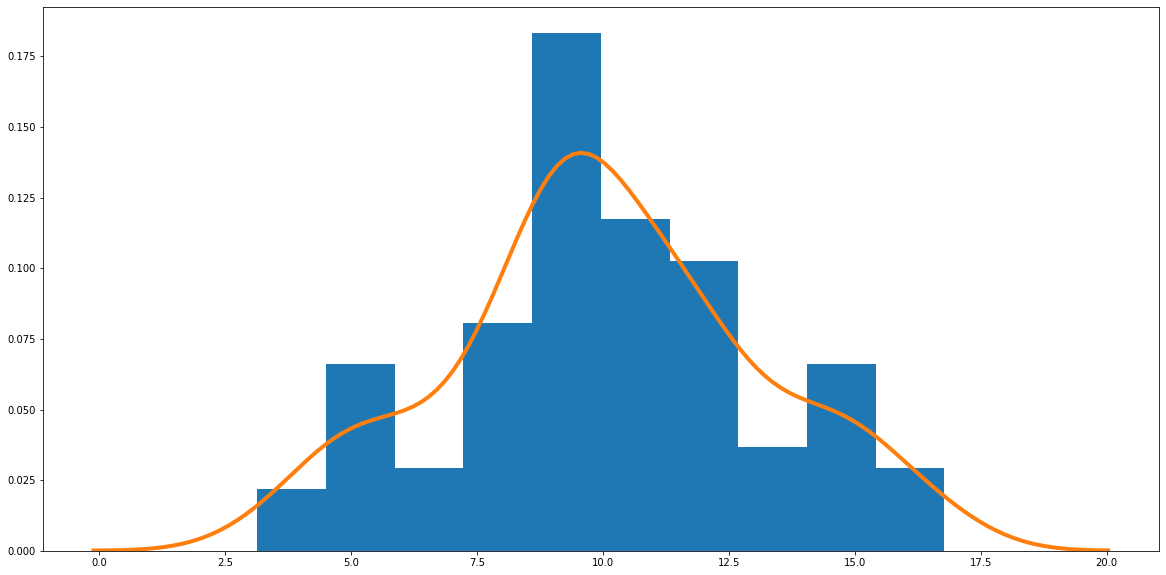

In [84]:
np.random.seed(7)

mu, sigma = 10, 3

ds_norm = np.random.normal(mu, sigma, 100)

plt.figure(figsize=(20,10))
plt.hist(ds_norm, bins='auto', density=True)
sb.distplot(ds_norm, hist=False, kde=True, kde_kws={'linewidth': 4})

plt.show()


### Explanation:
On the plot we could see histogram together with curve of density function for same distribution. As we could see data distribution is inline with density function in general, which is expected.

### (b)
### Calculation:
Now building Student $t_5$ distribution together with density function for N(10,3)

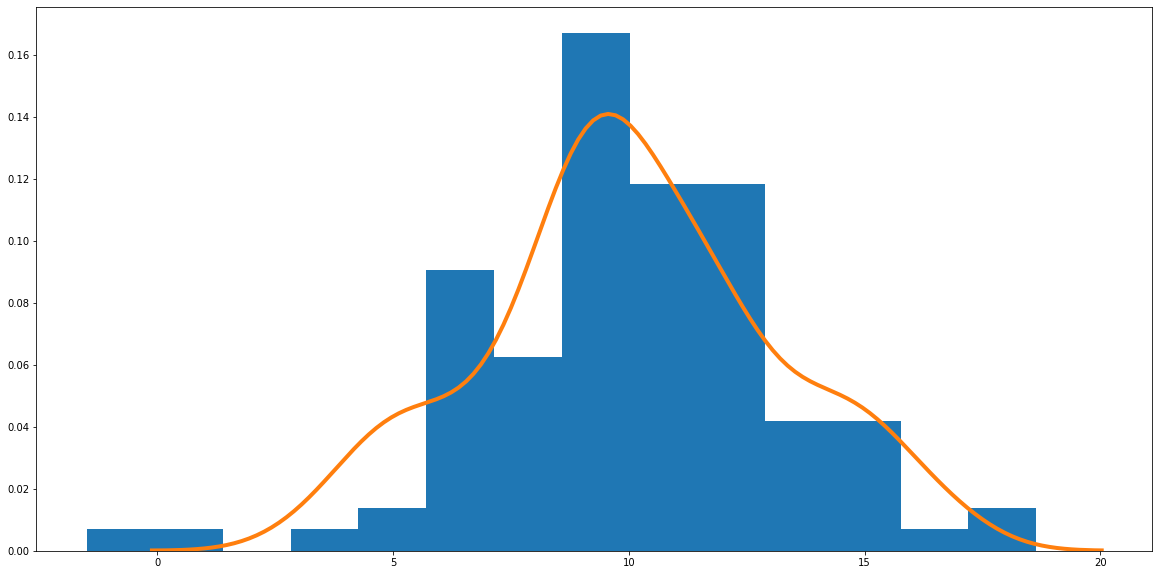

In [85]:
np.random.seed(7)

ds_t5 = np.random.standard_t(5, 100)
ds_t5 = 10+3*np.sqrt(3/5)*ds_t5

plt.figure(figsize=(20,10))
plt.hist(ds_t5, bins='auto', density=True)
sb.distplot(ds_norm, hist=False, kde=True, kde_kws={'linewidth': 4})

plt.show()

From this plot it is noticable that Students $t_5$ distribution does not follow density function of N(10,3) on the left side of plot. Around mean value we could assume that Student $t_5$ behaves like Normal distribution, but on the edges there are bigger density of data that it should be in Normal distribution. Such distributions could be more usefull in empirical studies than Normal distribution, because Student has data on the edges of the distribution, which will serve as outliers. Otherwise other methodics should be used to add outliers into simulated data.

### 2.
### (a) and (b)
Now we will generate subsamples of data from N(20,2) distribution and blend them into N(10,3) to obtain realistic heterogenous data. I have choose for set of subsamples of size 10, 30, 100 and 200 in order to visualize impact of those subsamples on initial distribution N(10,3).

After generation we will plot histograms and box plot first for subsamples and later for blended data to visualize impact.

Histograms and Box Plots for subsamples of N(20, 2)


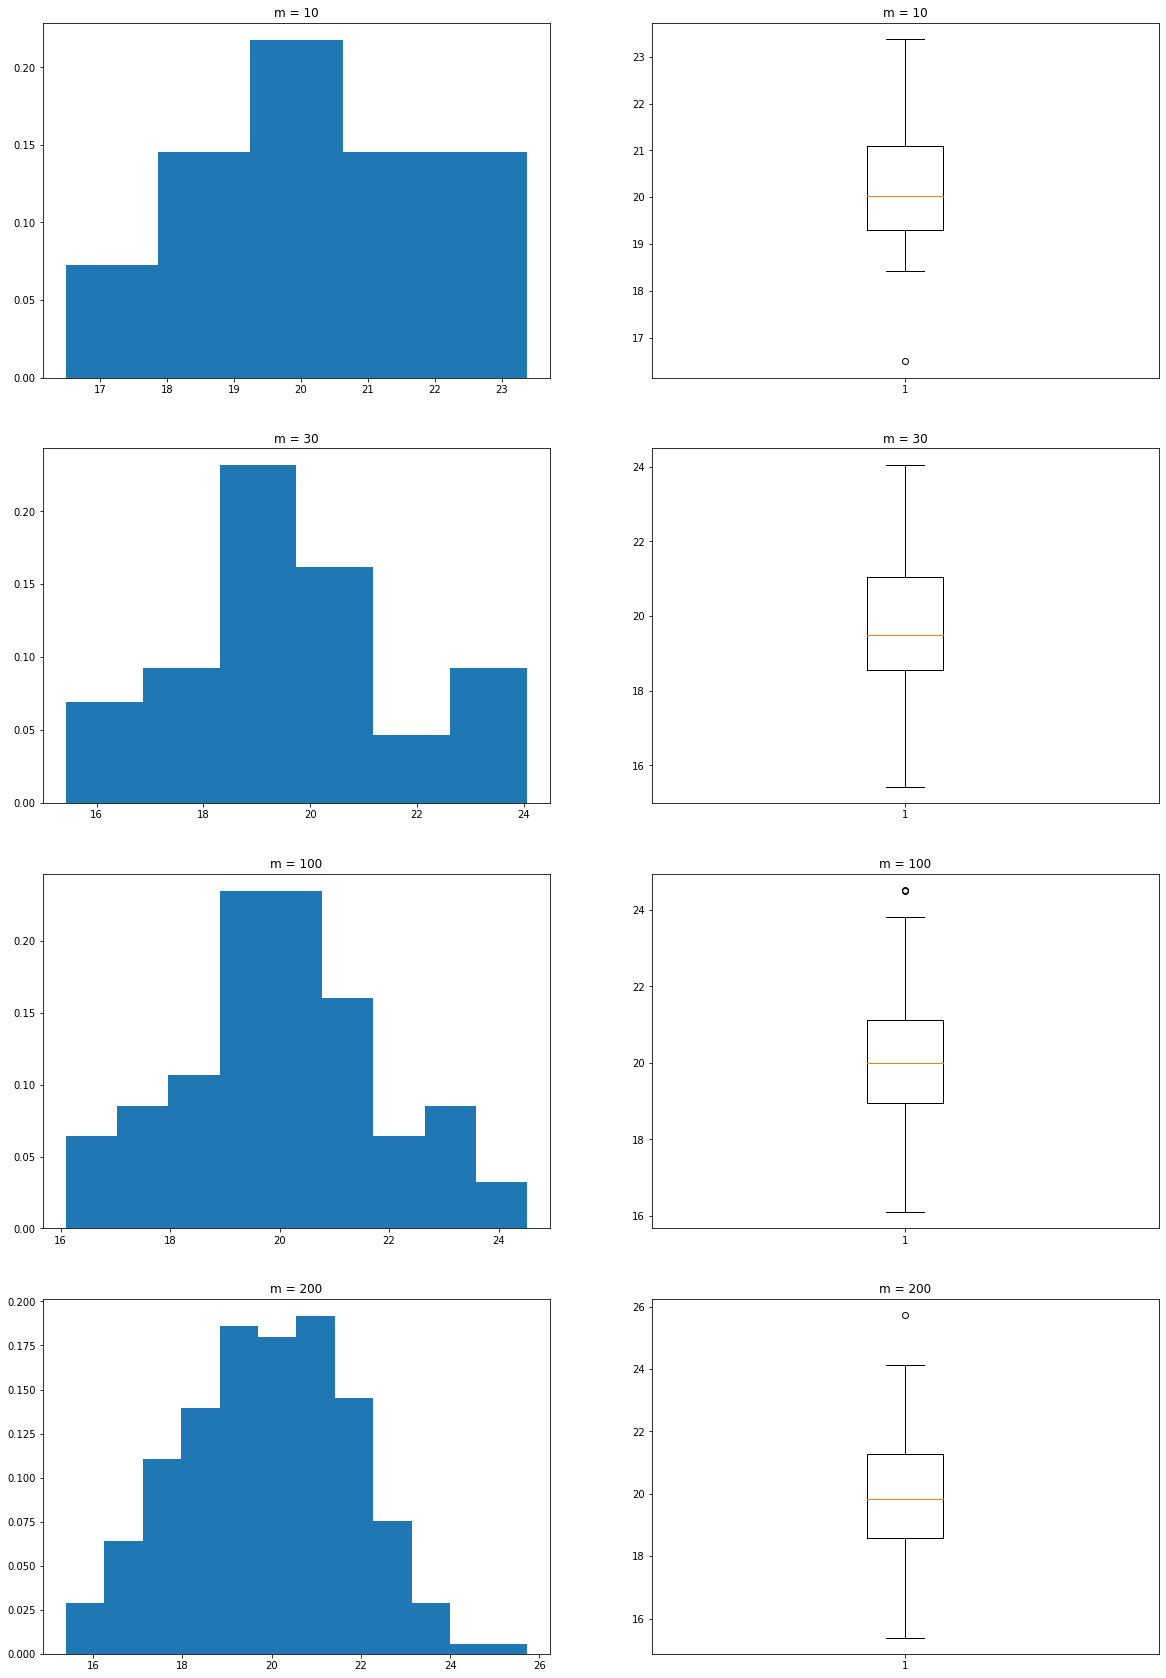

In [86]:
np.random.seed(7)

mu, sigma = 20, 2

d={}
m_list = [10, 30, 100, 200]

for m in m_list:
    ds_norm_o = np.random.normal(mu, sigma, m)
    d['m'+str(m)] = (np.concatenate((ds_norm, ds_norm_o)), ds_norm_o)

print('Histograms and Box Plots for subsamples of N(20, 2)')
plt.figure(figsize=(20,30))
i=1
for item in d:
    _, ds_o = d[item]
    plt.subplot(4,2,i)
    i+=1
    plt.title('m = '+item[1:4])
    plt.hist(ds_o, bins='auto', density=True)
    plt.subplot(4,2,i)
    i+=1
    plt.title('m = '+item[1:4])
    plt.boxplot(ds_o)    

As we could see from histograms and box plots for sub samples data is normally distributed with minimal to no number of outliers highlighted on the box plots.

Now we will blend data into original N(10,3) distribution and plot histogram and box plot after.

Histograms and Box Plots for samples mixed with subsamples of N(20, 2)


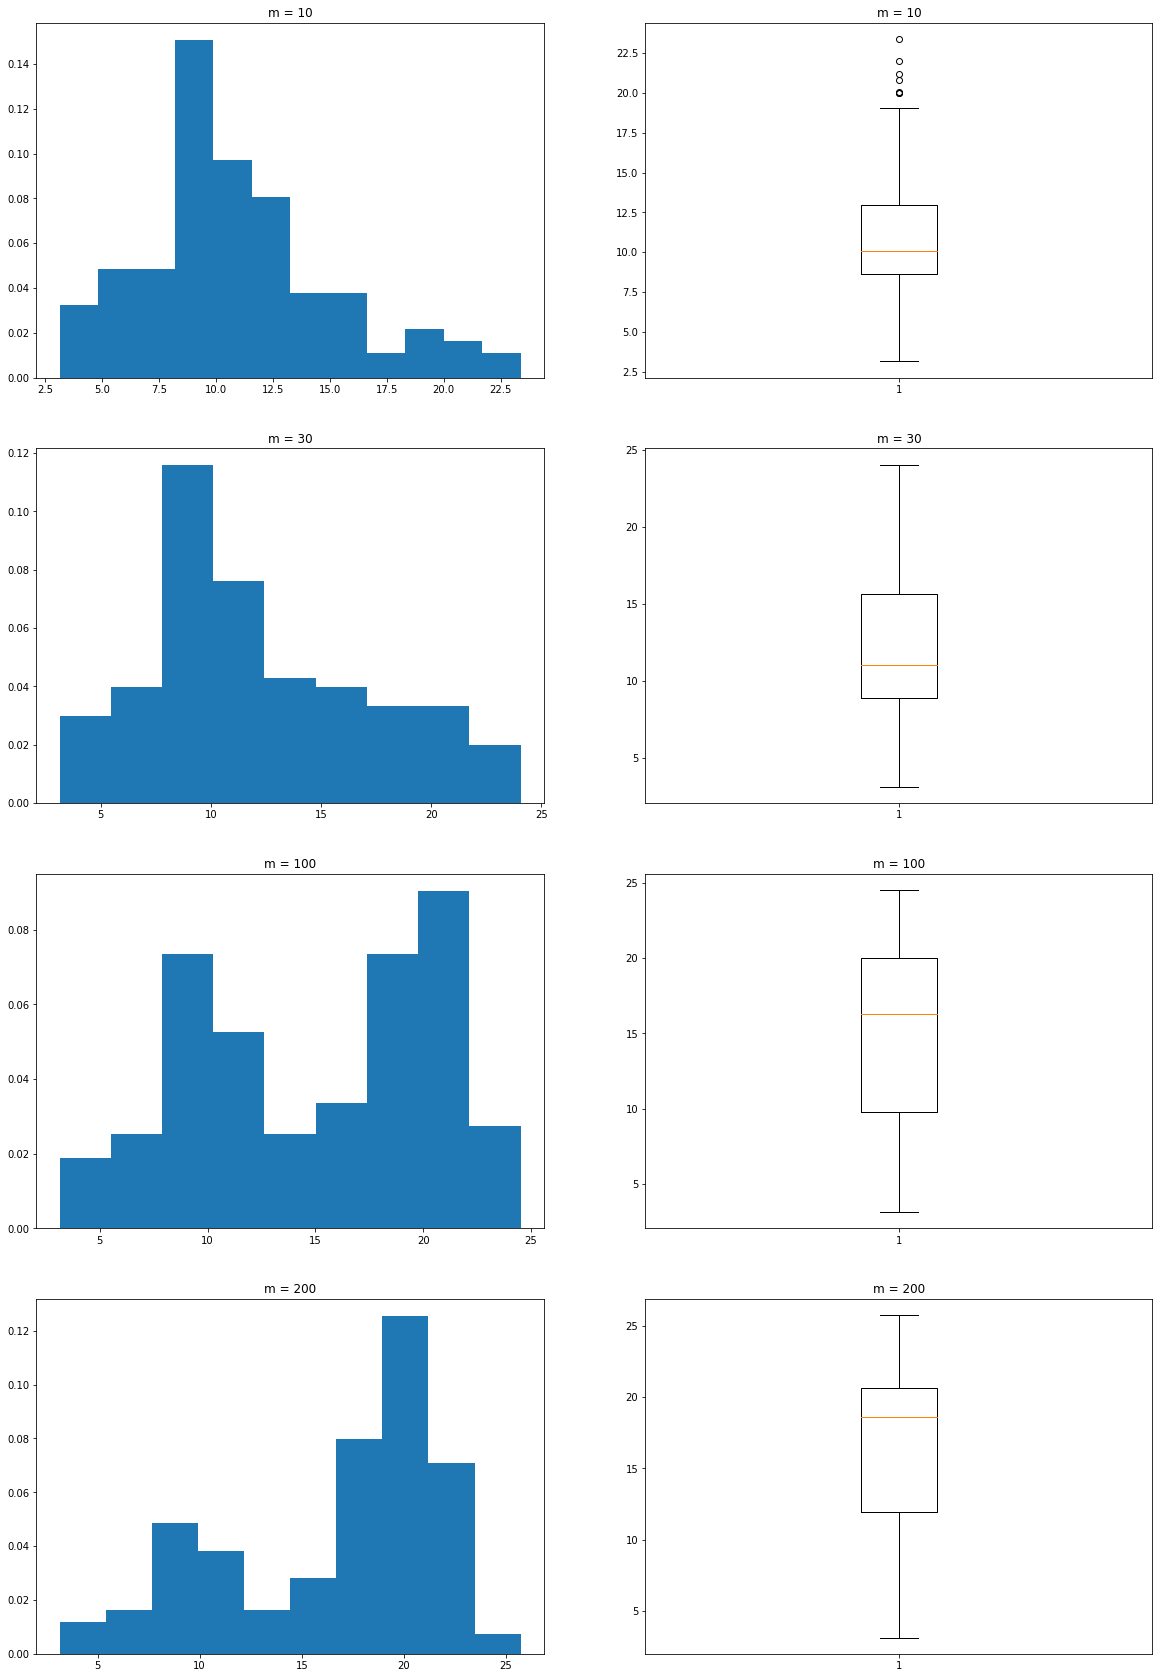

In [87]:
print('Histograms and Box Plots for samples mixed with subsamples of N(20, 2)')
plt.figure(figsize=(20,30))
i=1
for item in d:
    ds_m,_ = d[item]
    plt.subplot(4,2,i)
    i+=1
    plt.title('m = '+item[1:4])
    plt.hist(ds_m, bins='auto', density=True)
    plt.subplot(4,2,i)
    i+=1
    plt.title('m = '+item[1:4])
    plt.boxplot(ds_m)

As we could see from plots that subsamples of size 10 does not change distribution to much. With subsample of size 30 distribution has slight shift of data to the right direction (where Mean of subsample lies), but distribution still looks close to normal. With subsample of size 100 we could see two noticable peaks around Mean values for both distributions N(10,3) and N(20,2) which means that original distribution no longer normal one. And with subsample of size 200 there is a noticable shift of data to the Mean of 20 and there is another peak around Mean of 10. This also makes distribution not a Normal anymore.

### (c)
It was attempt to build interactive graphic, but I failed to do so. :) 

In [88]:
output_notebook()

ds_m,_ = d['m100']

hist, edges = np.histogram(ds_m, density=True, bins=50)

p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5)

# show the results
show(p)

Loading BokehJS ...

### 3.
### (a)
### Calculation:
Let's prove that parameter p equals to Corr(U,V) taking p as arbitrary parameter p=0.77.

In [89]:
np.random.seed(7)
mu, sigma = 0, 1

p = 0.77

ds_U = np.random.normal(mu, sigma, 100)
ds_V = np.random.normal(mu, sigma, 100)
ds_Vt = p*ds_U + np.sqrt(1-p**2)*ds_V

print('Corr(U,V) = %f' % stats.pearsonr(ds_U, ds_Vt)[0])
print('Variance of U = %f' % np.var(ds_U))
print('Variance of V = %f' % np.var(ds_Vt))

Corr(U,V) = 0.768864
Variance of U = 1.037830
Variance of V = 0.910600


As result we coudl see that Corr(U,V) almost the same as original p value choosen initially. However Variances for U and V slightly deviates ~10%.

### (b)


Pearson Corr = 0.967673
Spearman Corr = 0.952451


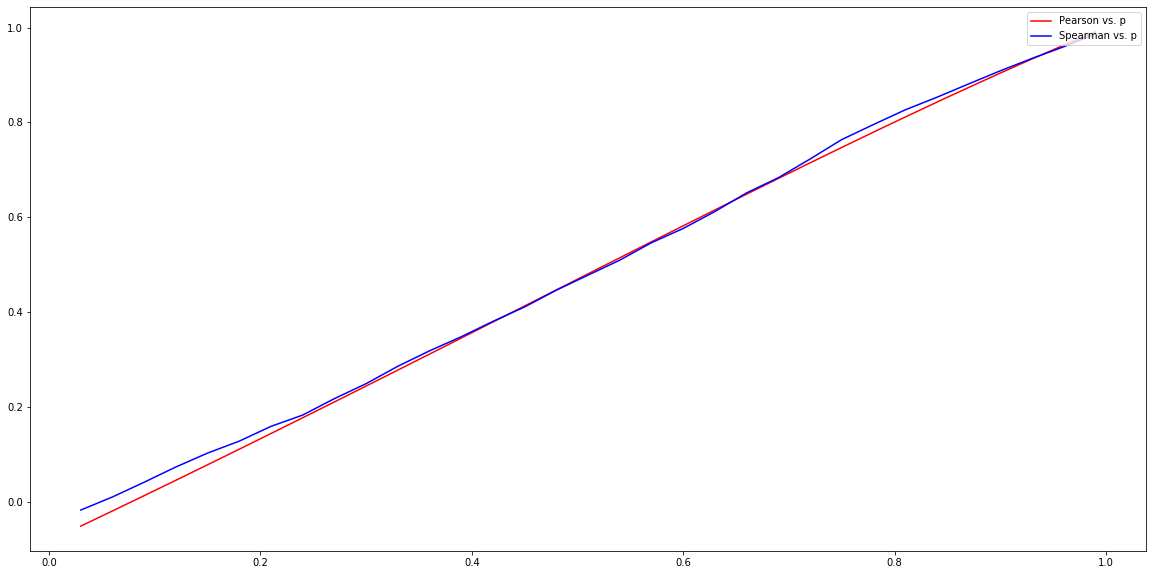

In [90]:
np.random.seed(7)
mu, sigma = 0, 1

p1 = 0.65
p2 = 0.81

ds_1st_n = np.random.normal(mu, sigma, 100)
ds_2nd_n = np.random.normal(mu, sigma, 100)

ds_1st = p1*ds_1st_n + np.sqrt(1-p1**2)*ds_2nd_n
ds_2nd = p2*ds_1st_n + np.sqrt(1-p2**2)*ds_2nd_n

print('Pearson Corr = %f' % stats.pearsonr(ds_1st, ds_2nd)[0])
print('Spearman Corr = %f' % stats.spearmanr(ds_1st, ds_2nd)[0])

p_i = 0.03
i=1
data={}
while p_i < 1:
    ds_tr = p_i*ds_1st_n + np.sqrt(1-p_i**2)*ds_2nd_n
    data[i] = (p_i, stats.pearsonr(ds_1st_n, ds_tr)[0], stats.spearmanr(ds_1st_n, ds_tr)[0])
    p_i+= 0.03
    i+=1

    
plt.figure(figsize=(20,10))
x = np.zeros(len(data))
pear = np.zeros(len(data))
spear = np.zeros(len(data))

for item in data:
    x[item-1],pear[item-1],spear[item-1] = data[item]

plt.plot(x, pear, 'r', label='Pearson vs. p')
plt.plot(x, spear, 'b', label='Spearman vs. p')
plt.legend(loc='upper right')

plt.show()

Corr(U,Exp) = -0.018665
Variance of V = 1.037830
Variance of Exp = 1.890726


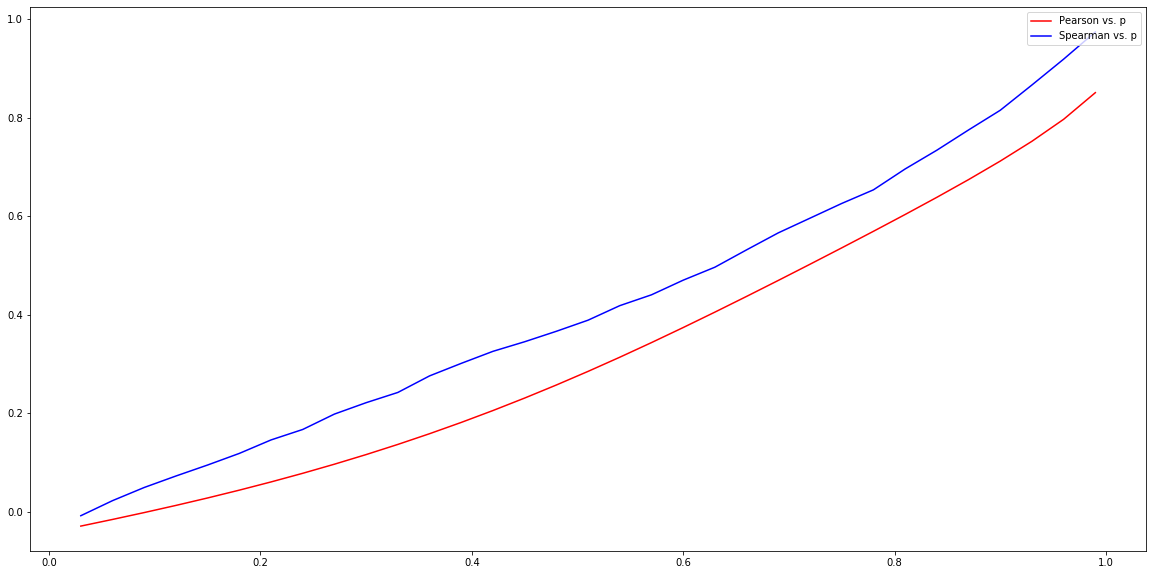

In [91]:
np.random.seed(7)
mu, sigma = 0, 1

ds_U = np.random.normal(mu, sigma, 100)
ds_V = np.random.normal(mu, sigma, 100)
ds_Ve = np.exp(ds_Vt)

p=0.83
ds_1st_n = np.random.normal(mu, sigma, 100)
ds_2nd_n = np.random.normal(mu, sigma, 100)
ds_exp = np.exp(p*ds_1st_n + np.sqrt(1-p**2)*ds_2nd_n)

print('Corr(U,Exp) = %f' % stats.pearsonr(ds_U, ds_exp)[0])
print('Variance of V = %f' % np.var(ds_U))
print('Variance of Exp = %f' % np.var(ds_exp))

p_i = 0.03
i=1
data={}
while p_i < 1:
    ds_tr = np.exp(p_i*ds_1st_n + np.sqrt(1-p_i**2)*ds_2nd_n)
    data[i] = (p_i, stats.pearsonr(ds_1st_n, ds_tr)[0], stats.spearmanr(ds_1st_n, ds_tr)[0])
    p_i+= 0.03
    i+=1

    
plt.figure(figsize=(20,10))
x = np.zeros(len(data))
pear = np.zeros(len(data))
spear = np.zeros(len(data))

for item in data:
    x[item-1],pear[item-1],spear[item-1] = data[item]

plt.plot(x, pear, 'r', label='Pearson vs. p')
plt.plot(x, spear, 'b', label='Spearman vs. p')
plt.legend(loc='upper right')

plt.show()